# Exercice : Fonctions de perte, gradients, convexité et visualisation

Ce notebook couvre :  
1. Expressions symboliques des gradients pour MSE, BCE, CCE, Huber.  
2. Étude des propriétés de convexité.  
3. Génération de petits jeux de données (régression et classification).  
4. Visualisation des surfaces de perte.  
5. Calcul de l'équation de la tangente à une ellipse en un point donné.  


### Membres de l’équipe :  
- 1- Nom :  BONO MBELLE AURELIEN  — Matricule 24F2459  
- 2- Nom :  TAPAH NGASSA CLAUDIA  — Matricule 20V2342  
- 3- Nom :  BITA ANGO'O WILLIAL MARRION  — Matricule 18T2779


In [ ]:
!pip install sympy numpy matplotlib

In [57]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1- Symbolic definitions


In [58]:
x1, x2, y = sp.symbols('x1 x2 y', real=True)
w1, w2, b = sp.symbols('w1 w2 b', real=True)
delta = sp.symbols('delta', positive=True)

s = w1*x1 + w2*x2 + b
res = y - s

## MSE


In [59]:
MSE = sp.Rational(1,2)*(y - s)**2
grad_MSE = [sp.simplify(sp.diff(MSE, v)) for v in (w1,w2,b)]


## BCE (sigmoid)


In [60]:
sig = 1/(1+sp.exp(-s))
BCE = - (y*sp.log(sig) + (1-y)*sp.log(1-sig))
grad_BCE = [sp.simplify(sp.diff(BCE, v)) for v in (w1,w2,b)]


## Categorical CE (softmax) - gradient wrt scores s1,s2,s3


In [61]:
s1, s2, s3 = sp.symbols('s1 s2 s3', real=True)
t1, t2, t3 = sp.symbols('t1 t2 t3', integer=True, nonnegative=True)
exp1, exp2, exp3 = sp.exp(s1), sp.exp(s2), sp.exp(s3)
Z = exp1 + exp2 + exp3
soft1 = exp1/Z; soft2 = exp2/Z; soft3 = exp3/Z
CE = - (t1*sp.log(soft1) + t2*sp.log(soft2) + t3*sp.log(soft3))
grad_CE_scores = [sp.simplify(sp.diff(CE, si)) for si in (s1,s2,s3)]

## Huber (piecewise)


In [62]:

Huber = sp.Piecewise((sp.Rational(1,2)*res**2, sp.Abs(res) <= delta),
                     (delta*(sp.Abs(res) - sp.Rational(1,2)*delta), True))
grad_Huber = [sp.simplify(sp.diff(Huber, v)) for v in (w1,w2,b)]


## Affichage les gradients symboliques (lisibles)


In [63]:


print("MSE gradients (w1,w2,b):")
for g in grad_MSE: print(sp.pretty(g))

MSE gradients (w1,w2,b):
x₁⋅(b + w₁⋅x₁ + w₂⋅x₂ - y)
x₂⋅(b + w₁⋅x₁ + w₂⋅x₂ - y)
b + w₁⋅x₁ + w₂⋅x₂ - y


In [64]:

print("\nBCE gradients (w1,w2,b):")
for g in grad_BCE: print(sp.pretty(g))


BCE gradients (w1,w2,b):
   ⎛     b + w₁⋅x₁ + w₂⋅x₂        b + w₁⋅x₁ + w₂⋅x₂⎞
x₁⋅⎝- y⋅ℯ                  - y + ℯ                 ⎠
────────────────────────────────────────────────────
                b + w₁⋅x₁ + w₂⋅x₂                   
               ℯ                  + 1               
   ⎛     b + w₁⋅x₁ + w₂⋅x₂        b + w₁⋅x₁ + w₂⋅x₂⎞
x₂⋅⎝- y⋅ℯ                  - y + ℯ                 ⎠
────────────────────────────────────────────────────
                b + w₁⋅x₁ + w₂⋅x₂                   
               ℯ                  + 1               
     b + w₁⋅x₁ + w₂⋅x₂        b + w₁⋅x₁ + w₂⋅x₂
- y⋅ℯ                  - y + ℯ                 
───────────────────────────────────────────────
             b + w₁⋅x₁ + w₂⋅x₂                 
            ℯ                  + 1             


In [65]:

print("\nCategorical CE gradients wrt scores (s1,s2,s3):")
for g in grad_CE_scores: print(sp.pretty(g))




Categorical CE gradients wrt scores (s1,s2,s3):
      s₂       s₃       s₁       s₁
- t₁⋅ℯ   - t₁⋅ℯ   + t₂⋅ℯ   + t₃⋅ℯ  
───────────────────────────────────
           s₁    s₂    s₃          
          ℯ   + ℯ   + ℯ            
    s₂       s₁       s₃       s₂
t₁⋅ℯ   - t₂⋅ℯ   - t₂⋅ℯ   + t₃⋅ℯ  
─────────────────────────────────
          s₁    s₂    s₃         
         ℯ   + ℯ   + ℯ           
    s₃       s₃       s₁       s₂
t₁⋅ℯ   + t₂⋅ℯ   - t₃⋅ℯ   - t₃⋅ℯ  
─────────────────────────────────
          s₁    s₂    s₃         
         ℯ   + ℯ   + ℯ           


In [66]:
print("\nHuber gradients (piecewise):")
for g in grad_Huber: print(sp.pretty(g))


Huber gradients (piecewise):
⎧                 x₁⋅(b + w₁⋅x₁ + w₂⋅x₂ - y)                   for δ ≥ │b + w₁ ↪
⎪                                                                              ↪
⎪⎧             0                for b + w₁⋅x₁ + w₂⋅x₂ - y = 0                  ↪
⎨⎪                                                                             ↪
⎪⎨δ⋅x₁⋅(b + w₁⋅x₁ + w₂⋅x₂ - y)                                            othe ↪
⎪⎪────────────────────────────            otherwise                            ↪
⎩⎩  │b + w₁⋅x₁ + w₂⋅x₂ - y│                                                    ↪

↪ ⋅x₁ + w₂⋅x₂ - y│
↪                 
↪                 
↪                 
↪ rwise           
↪                 
↪                 
⎧                 x₂⋅(b + w₁⋅x₁ + w₂⋅x₂ - y)                   for δ ≥ │b + w₁ ↪
⎪                                                                              ↪
⎪⎧             0                for b + w₁⋅x₁ + w₂⋅x₂ - y = 0                  ↪
⎨⎪                        

# 2- Petits ensembles de données

In [67]:
np.random.seed(0)


## Regression  


In [68]:

n_reg = 100
X_reg = np.random.randn(n_reg,2)
true_w = np.array([1.5, -2.0])
y_reg = X_reg.dot(true_w) + 0.5*np.random.randn(n_reg)
df_reg = pd.DataFrame(X_reg, columns=['x1','x2'])
df_reg['y'] = y_reg


## Classification


In [69]:

n_clf = 100
X_clf = np.random.randn(n_clf,2)
scores = X_clf.dot(np.array([2.0, -1.0])) + 0.3*np.random.randn(n_clf)
y_clf = (scores > 0).astype(int)
df_clf = pd.DataFrame(X_clf, columns=['x1','x2'])
df_clf['y'] = y_clf

In [70]:


print("\nRegression dataset (first 5 rows):")
df_reg.head()




Regression dataset (first 5 rows):


,x1,x2,y
0,1.764052,0.400157,1.661173
1,0.978738,2.240893,-3.133369
2,1.867558,-0.977278,5.305723
3,0.950088,-0.151357,2.055479
4,-0.103219,0.410599,-0.655960


In [71]:
print("\nClassification dataset (first 5 rows):")
df_clf.head()


Classification dataset (first 5 rows):


,x1,x2,y
0,-1.306527,1.658131,0
1,-0.118164,-0.680178,1
2,0.666383,-0.460720,1
3,-1.334258,-1.346718,0
4,0.693773,-0.159573,1


# 3- Tracé de la surface de perte (fixer b = 0)

In [72]:

def mse_loss_grid(X, y, W1, W2):
    losses = np.zeros_like(W1)
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            w = np.array([W1[i,j], W2[i,j]])
            preds = X.dot(w)
            losses[i,j] = 0.5*np.mean((y - preds)**2)
    return losses

def bce_loss_grid(X, y, W1, W2):
    losses = np.zeros_like(W1)
    eps = 1e-9
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            w = np.array([W1[i,j], W2[i,j]])
            s = X.dot(w)
            p = 1/(1+np.exp(-s))
            losses[i,j] = -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))
    return losses


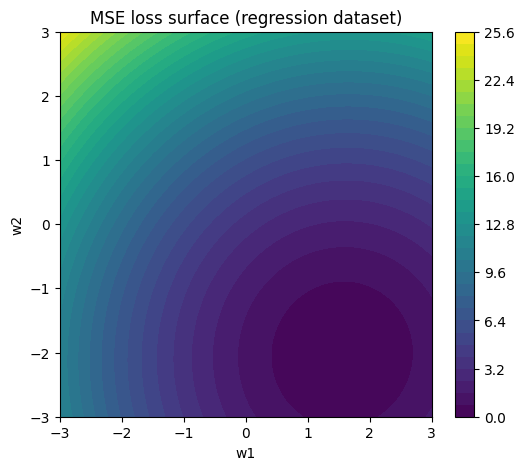

In [73]:

grid = np.linspace(-3,3,121)
W1g, W2g = np.meshgrid(grid, grid)

MSEsurf = mse_loss_grid(X_reg, y_reg, W1g, W2g)
plt.figure(figsize=(6,5))
plt.contourf(W1g, W2g, MSEsurf, levels=40)
plt.title("MSE loss surface (regression dataset)")
plt.xlabel("w1"); plt.ylabel("w2")
plt.colorbar()
plt.show()



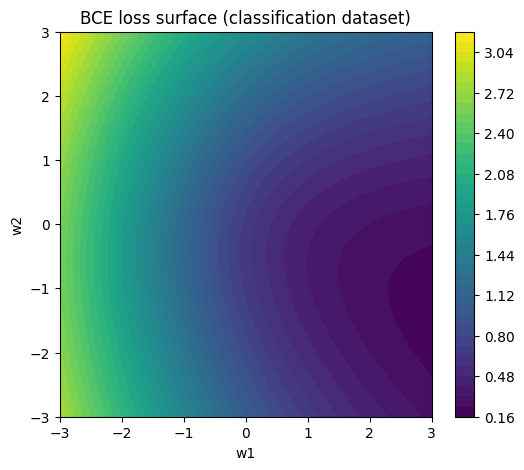

In [74]:
BCEsurf = bce_loss_grid(X_clf, y_clf, W1g, W2g)
plt.figure(figsize=(6,5))
plt.contourf(W1g, W2g, BCEsurf, levels=40)
plt.title("BCE loss surface (classification dataset)")
plt.xlabel("w1"); plt.ylabel("w2")
plt.colorbar()
plt.show()


## 4- Exemple de tangente à une ellipse (symbolique -> numérique)

In [75]:

x, y_sym, a, b = sp.symbols('x y a b', real=True, positive=True)
F = x**2/a**2 + y_sym**2/b**2 - 1
Fx = sp.diff(F, x); Fy = sp.diff(F, y_sym)

In [76]:


# numeric example a=3,b=2, t=pi/4
aval = 3; bval = 2
tval = sp.pi/4
x0 = float(aval*sp.cos(tval))
y0 = float(bval*sp.sin(tval))
X, Y = sp.symbols('X Y', real=True)
tangent_eq = Fx.subs({x:x0,a:aval,b:bval})*(X - x0) + Fy.subs({y_sym:y0,a:aval,b:bval})*(Y - y0)
tangent_line = sp.solve(sp.Eq(tangent_eq,0), Y)[0]
tangent_line_simpl = sp.simplify(tangent_line)



In [77]:
print("\nTangent line (Y as fn of X):")
sp.pprint(tangent_line_simpl)



Tangent line (Y as fn of X):
2.82842712474619 - 0.666666666666667⋅X


In [78]:
print("\nNumeric slope and intercept:")
slope = sp.diff(tangent_line_simpl, X)
intercept = tangent_line_simpl.subs(X, 0)
print(float(slope), float(intercept))


Numeric slope and intercept:
-0.6666666666666666 2.828427124746188
